# Assignment 3_Amit Kumar

In [1]:
#
import os
import numpy as np
import pandas as pd
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
#
from talib import RSI, BBANDS, MACD, ATR
#
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
import zipline
import datetime
import pytz
from zipline.data.bundles import load
#from trading_calendars import get_calendar
import pyfolio as pf
#
%load_ext zipline

In [2]:
import warnings
warnings.filterwarnings("ignore")


### custom data bundle were created for AAPL stock 

## 1. Strategy 1: Buy and hold for the period of investment

#### I  started with a basic strategy, that is, Buy and Hold. Here the idea was to buy AAPL stocks and no nothing for entire period of investement. This strategy was also created as bench mark for other advance strategy.

In [9]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o buy_and_hold.pkl 

# imports 2017-02-23
from zipline.api import order, symbol, record, set_benchmark

# parameters
selected_stock = 'daily'
n_stocks_to_buy = 10

def initialize(context):
    set_benchmark(symbol('daily'))
    context.asset = symbol('daily')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True

,period_open,period_close,short_value,returns,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,alpha,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label
2017-02-23 21:00:00+00:00,2017-02-23 14:31:00+00:00,2017-02-23 21:00:00+00:00,0.0,0.000000,0.00,0.000000,0.0,0.000000,"[{'id': 'c69013a94ce5475dbc3df47ba2801e56', 'd...",[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,1,2017-02
2017-02-24 21:00:00+00:00,2017-02-24 14:31:00+00:00,2017-02-24 21:00:00+00:00,0.0,-0.000723,341.65,-0.180825,0.0,-341.830825,"[{'id': 'c69013a94ce5475dbc3df47ba2801e56', 'd...","[{'amount': 10, 'dt': 2017-02-24 21:00:00+00:0...",...,-0.145926,-0.100898,-11.224972,-11.224972,-0.000723,1.367589,0.0,0.0,2,2017-02
2017-02-27 21:00:00+00:00,2017-02-27 14:31:00+00:00,2017-02-27 21:00:00+00:00,0.0,0.002682,342.32,0.670000,0.0,0.000000,[],[],...,0.234749,0.168834,5.776966,24.818513,-0.000723,1.367589,0.0,0.0,3,2017-02
2017-02-28 21:00:00+00:00,2017-02-28 14:31:00+00:00,2017-02-28 21:00:00+00:00,0.0,0.000639,342.48,0.160000,0.0,0.000000,[],[],...,0.211709,0.161021,7.036947,28.502895,-0.000723,1.367589,0.0,0.0,4,2017-02
2017-03-01 21:00:00+00:00,2017-03-01 14:31:00+00:00,2017-03-01 21:00:00+00:00,0.0,0.027888,349.47,6.990000,0.0,0.000000,[],[],...,0.641638,1.172501,7.902776,299.214501,-0.000723,1.367589,0.0,0.0,5,2017-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.0,0.000000,437.52,0.000000,0.0,0.000000,[],[],...,0.014819,1.309434,1.794499,2.813371,-0.115844,1.367589,0.0,0.0,212,2017-12
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0.0,-0.032081,426.43,-11.090000,0.0,0.000000,[],[],...,0.016374,1.308379,1.603996,2.476972,-0.115844,1.367589,0.0,0.0,213,2017-12
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.0,0.000209,426.50,0.070000,0.0,0.000000,[],[],...,0.016289,1.308382,1.601299,2.472823,-0.115844,1.367589,0.0,0.0,214,2017-12
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.0,0.003586,427.70,1.200000,0.0,0.000000,[],[],...,0.016102,1.308371,1.615726,2.495198,-0.115844,1.367589,0.0,0.0,215,2017-12


## performance DataFrame

In [10]:
# read the performance summary dataframe
buy_and_hold_results = pd.read_pickle('buy_and_hold.pkl')

In [11]:
buy_and_hold_results.transactions.value_counts()

[]                                                                                                                                                                      215
[{'amount': 10, 'dt': 2017-02-24 21:00:00+00:00, 'price': 34.1820825, 'order_id': 'c69013a94ce5475dbc3df47ba2801e56', 'sid': Equity(0 [DAILY]), 'commission': None}]      1
Name: transactions, dtype: int64

### visualization of  strategy 1 features

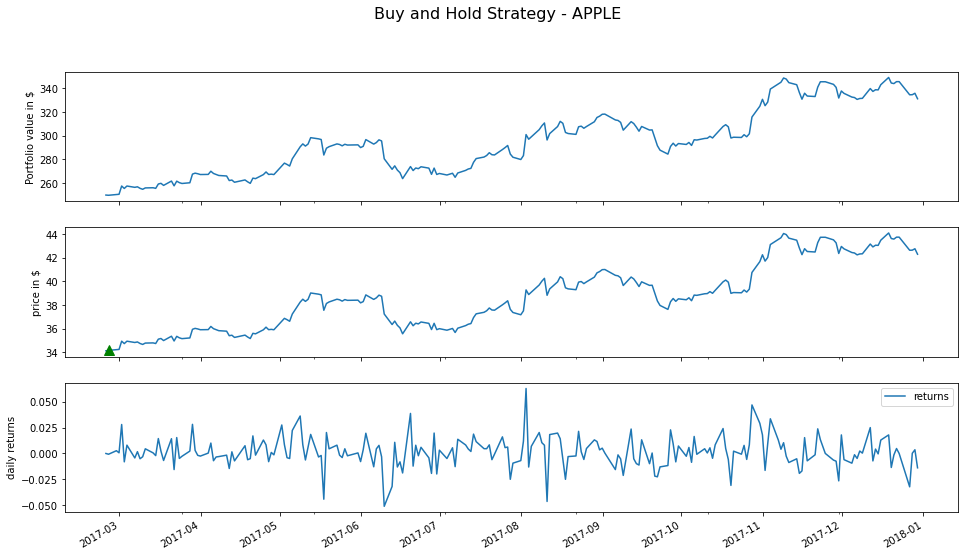

Final portfolio value (including cash): 331.24$
Final portfolio value (including cash): 249.82$


Start date,2017-02-24
End date,2017-02-24
Total months,0
,Backtest
Annual return,-16.7%
Cumulative returns,-0.1%
Annual volatility,nan%
Sharpe ratio,NaN
Calmar ratio,-230.44
Stability,NaN
Max drawdown,-0.1%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [12]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

# portfolio value
buy_and_hold_results.portfolio_value.plot(ax=ax[0])
ax[0].set_ylabel('Portfolio value in $')

# asset
buy_and_hold_results.price.plot(ax=ax[1])
ax[1].set_ylabel('price in $')

# mark transactions
perf_trans = buy_and_hold_results.loc[[t != [] for t in buy_and_hold_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax[1].plot(buys.index, buy_and_hold_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax[1].plot(sells.index, buy_and_hold_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')

# daily returns
buy_and_hold_results.returns.plot(ax=ax[2])
ax[2].set_ylabel('daily returns')

fig.suptitle('Buy and Hold Strategy - APPLE', fontsize=16)
plt.legend()
plt.show()

print('Final portfolio value (including cash): {}$'.format(np.round(buy_and_hold_results.portfolio_value[-1], 2)))



print('Final portfolio value (including cash): {}$'.format(np.round(perf_trans.portfolio_value[-1], 2)))

# Extract algo returns and benchmark returns
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf_trans)
benchmark_period_return = perf_trans['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

In [ ]:
pd.DataFrame.from_records([x[0] for x in buy_and_hold_results.transactions.values if x != []])

In [13]:
buy_and_hold_results.columns

Index(['period_open', 'period_close', 'short_value', 'returns',
       'long_exposure', 'pnl', 'short_exposure', 'capital_used', 'orders',
       'transactions', 'gross_leverage', 'positions', 'net_leverage',
       'starting_exposure', 'ending_exposure', 'starting_value',
       'ending_value', 'starting_cash', 'ending_cash', 'portfolio_value',
       'longs_count', 'shorts_count', 'long_value', 'price',
       'algorithm_period_return', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility', 'alpha', 'beta', 'sharpe', 'sortino',
       'max_drawdown', 'max_leverage', 'excess_return',
       'treasury_period_return', 'trading_days', 'period_label'],
      dtype='object')

## Strategy 2: Simple Moving Average Strategy

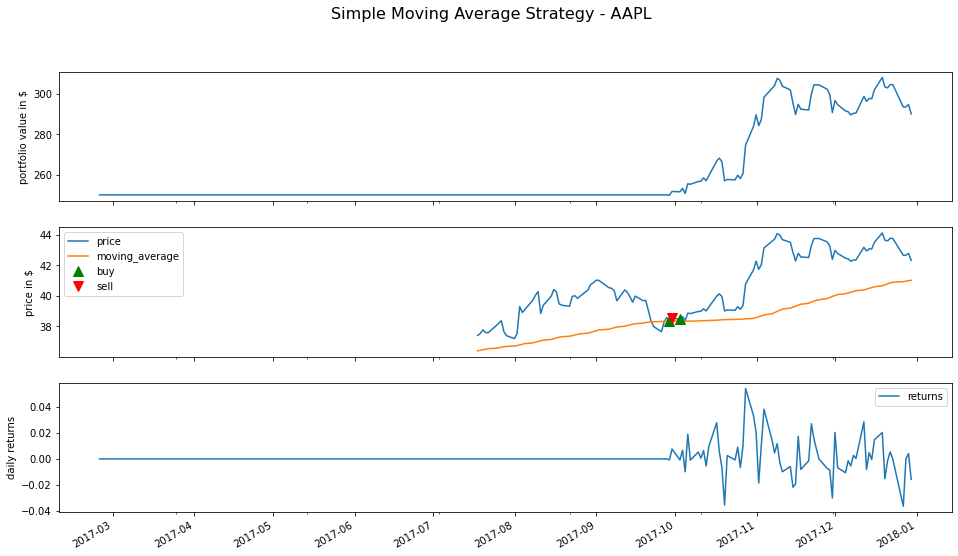

Final portfolio value (including cash): 290.07$


Start date,2017-02-23
End date,2017-12-29
Total months,10
,Backtest
Annual return,18.9%
Cumulative returns,16.0%
Annual volatility,14.1%
Sharpe ratio,1.30
Calmar ratio,3.22
Stability,0.54
Max drawdown,-5.9%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [15]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o sma_strategy.pkl 
# imports 
from zipline.api import order_target, record, symbol, set_benchmark
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

# parameters 
ma_periods = 100
selected_stock = 'daily'
n_stocks_to_buy = 10

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < ma_periods:
        return

    # 3. access price history
    price_history_1 = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
 
    # 4. calculate moving averages
    ma = price_history_1.mean()
    # 5. trading logic
        # cross up
    if (price_history_1[-2] < ma) & (price_history_1[-1] > ma):
        order_target(context.asset, n_stocks_to_buy)
    # cross down
    elif (price_history_1[-2] > ma) & (price_history_1[-1] < ma):
        order_target(context.asset, 0)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           moving_average=ma)
    
    # 6. analyze block
def analyze(context, perf):
    
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'moving_average']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Simple Moving Average Strategy - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    import pyfolio as pf
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    
    # Extract algo returns and benchmark returns
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    benchmark_period_return = perf['benchmark_period_return']

    # Convert benchmark returns to daily returns
    #daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
    daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

    # Create tear sheet
    pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

## Strategy 3: RSI

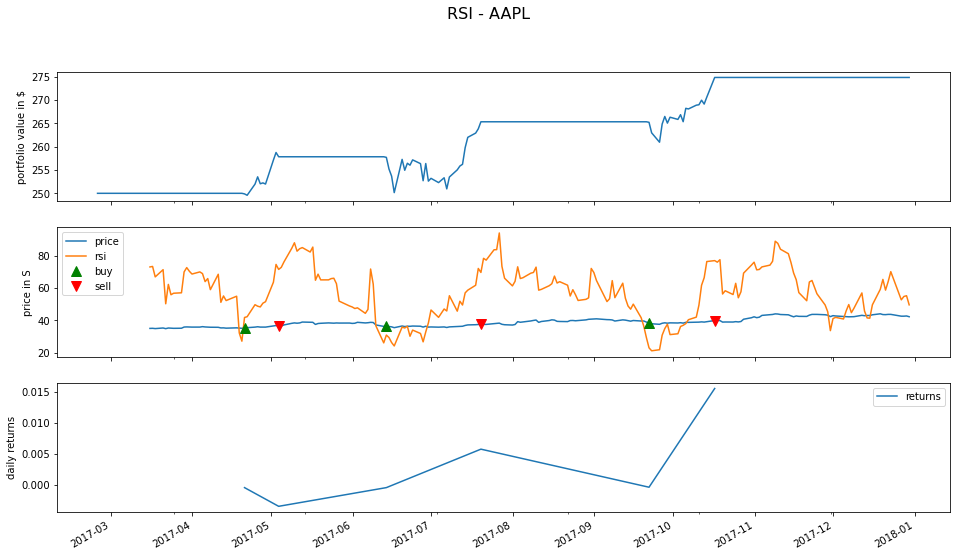

Final portfolio value (including cash): 274.82$
Final portfolio value (including cash): 274.82$


Start date,2017-04-20
End date,2017-10-16
Total months,0
,Backtest
Annual return,97.5%
Cumulative returns,1.6%
Annual volatility,11.1%
Sharpe ratio,6.19
Calmar ratio,215.65
Stability,0.53
Max drawdown,-0.5%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [18]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o rsi.pkl 
# imports 
from zipline.api import order_target, record, symbol, set_benchmark, order_percent
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np
from talib import RSI
import talib as ta


# parameters 
selected_stock = 'daily'
n_stocks_to_buy = 10
UPPER = 70
LOWER = 30
RSI_PERIOD = 14

def initialize(context):
    context.time = 0
    context.has_position = True
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < RSI_PERIOD + 1:
        return
        
    price_history_3 = data.history(context.asset, fields="price", bar_count=RSI_PERIOD+1, frequency="1d")
    rsi = ta.RSI(price_history_3, timeperiod=RSI_PERIOD)
    
    if rsi[-1] < LOWER and not context.has_position:
        order_percent(context.asset, 1.0)
        context.has_position = True
      
    if rsi[-1] > UPPER and context.has_position:
        order_target(context.asset, 0)
        context.has_position = False
     
    record(rsi=rsi[-1], price=price_history_3[-1], time=context.time)
    
    # 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'rsi']].plot(ax=ax[1])
    ax[1].set_ylabel('price in S')
    
    # mark transactions
    perf = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf.loc[[t[0]['amount'] > 0 for t in perf.transactions]]
    sells = perf.loc[[t[0]['amount'] < 0 for t in perf.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('RSI - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    
    
    import pyfolio as pf
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    
    # Extract algo returns and benchmark returns
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    benchmark_period_return = perf['benchmark_period_return']

    # Convert benchmark returns to daily returns
    #daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
    daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

    # Create tear sheet
    pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)
    

### Strategy 4: Moving Average Convergence, a changes in the strength, direction, momentum, and duration of a trend in a stock's price

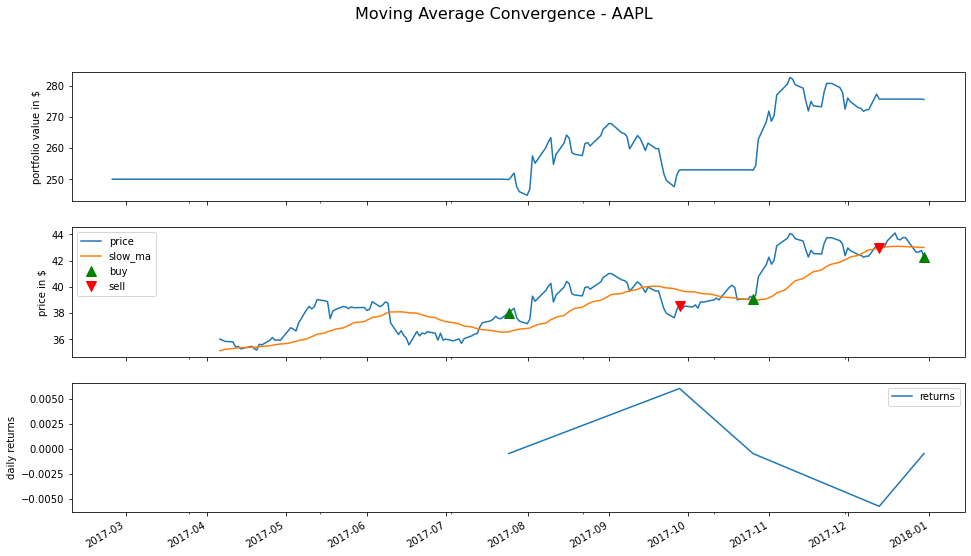

Final portfolio value (including cash): 275.54$
Final portfolio value (including cash): 275.54$


Start date,2017-07-24
End date,2017-12-29
Total months,0
,Backtest
Annual return,-5.4%
Cumulative returns,-0.1%
Annual volatility,6.6%
Sharpe ratio,-0.82
Calmar ratio,-8.18
Stability,0.13
Max drawdown,-0.7%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [20]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o macd.pkl
# imports 
from zipline.api import order_target, record, symbol, set_benchmark, order_percent
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

# parameters 

selected_stock = 'daily'
n_stocks_to_buy = 10
SLOW_MA_PERIODS = 100
FAST_MA_PERIODS = 20

def initialize(context):
    context.time = 0
    context.has_position = True
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < SLOW_MA_PERIODS:
        return
    fast_ma = data.history(context.asset, 'price', bar_count=FAST_MA_PERIODS, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=SLOW_MA_PERIODS, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'slow_ma']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf.loc[[t[0]['amount'] > 0 for t in perf.transactions]]
    sells = perf.loc[[t[0]['amount'] < 0 for t in perf.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Moving Average Convergence - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    
    
    import pyfolio as pf
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    
    # Extract algo returns and benchmark returns
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    benchmark_period_return = perf['benchmark_period_return']

    # Convert benchmark returns to daily returns
    #daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
    daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

    # Create tear sheet
    pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)
    

### conclusion
Strategy 1: Buy and hold : Backtest result
    Annual return	-16.7%
    Cumulative returns	-0.1%
    Annual volatility	nan%
    Sharpe ratio	NaN
Strategy 2: Simple Moving Average : Backtest result
    Backtest
    Annual return	18.9%
    Cumulative returns	16.0%
    Annual volatility	14.1%
    Sharpe ratio	1.30
Strategy 3: RSI : Backtest result
    Backtest
    Annual return	97.5%
    Cumulative returns	1.6%
    Annual volatility	11.1%
    Sharpe ratio	6.19
Strategy 4: Moving Average Convergence: Backtest result  
    Backtest
    Annual return	-5.4%
    Cumulative returns	-0.1%
    Annual volatility	6.6%
    Sharpe ratio	-0.82
    
Since higher Sharpe ratio indicates good investment performance: our results suggest Simple moving average and RSI strategy are expected to give good returns.